# 9.1 순환 신경망(Recurrent Neural Network, RNN)
RNN(Recurrent Neural Network)은 시퀀스(Sequence) 모델입니다. 입력과 출력을 시퀀스 단위로 처리하는 모델입니다. 
- 번역기를 생각해보면 입력은 번역하고자 하는 문장. 즉, 단어 시퀀스입니다. 
- 출력에 해당되는 번역된 문장 또한 단어 시퀀스입니다. 

이러한 시퀀스들을 처리하기 위해 고안된 모델들을 시퀀스 모델이라고 합니다. 
그 중에서도 RNN은 딥 러닝에 있어 가장 기본적인 시퀀스 모델입니다.

* LSTM이나 GRU 또한 근본적으로 RNN에 속합니다. 
* RNN을 이해하고 이를 통해 텍스트 분류, 태깅 작업, 기계 번역을 이해 해봅니다.

> 용어는 비슷하지만 순환 신경망과 재귀 신경망(Recursive Neural Network)은 전혀 다른 개념입니다.

### 1. 순환 신경망(Recurrent Neural Network, RNN)
앞서 배운 신경망들은 전부 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향했습니다. 이와 같은 신경망들을 피드 포워드 신경망(Feed Forward Neural Network)이라고 합니다. 그런데 그렇지 않은 신경망들이 있습니다. RNN(Recurrent Neural Network) 또한 그 중 하나입니다. RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.

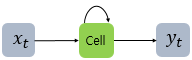

이를 그림으로 표현하면 위와 같습니다. 
- x는 입력층의 입력 벡터, y는 출력층의 출력 벡터입니다. 
- 실제로는 편향 b도 입력으로 존재할 수 있지만 앞으로의 그림에서는 생략합니다. 
- RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다. 
- 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현합니다.

은닉층의 메모리 셀은 
- 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 하고 있습니다. 
- 앞으로는 현재 시점을 변수 t로 표현하겠습니다. 

이는 현재 시점 t에서의 메모리 셀이 갖고있는 값은 과거의 메모리 셀들의 값에 영향을 받은 것임을 의미합니다. 그렇다면 메모리 셀이 갖고 있는 이 값은 뭐라고 부를까요?

메모리 셀이 
- 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값을 은닉 상태(hidden state)라고 합니다. 
- 다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용합니다

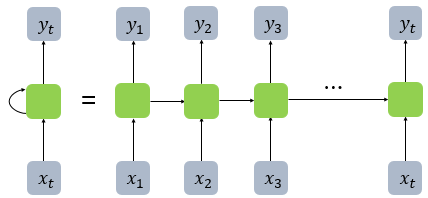

RNN을 표현할 때는 일반적으로 위의 그림에서 좌측과 같이 화살표로 사이클을 그려서 재귀 형태로 표현하기도 하지만, 우측과 같이 사이클을 그리는 화살표 대신 여러 시점으로 펼쳐서 표현하기도 합니다. 두 그림은 동일한 그림으로 단지 사이클을 그리는 화살표를 사용하여 표현하였느냐, 시점의 흐름에 따라서 표현하였느냐의 차이일 뿐 둘 다 동일한 RNN을 표현하고 있습니다.

피드 포워드 신경망에서는 뉴런이라는 단위를 사용했지만, RNN에서는 뉴런이라는 단위보다는 입력층과 출력층에서는 각각 입력 벡터와 출력 벡터, 은닉층에서는 은닉 상태라는 표현을 주로 사용합니다. 그래서 사실 위의 그림에서 회색과 초록색으로 표현한 각 네모들은 기본적으로 벡터 단위를 가정하고 있습니다. 피드 포워드 신경망과의 차이를 비교하기 위해서 RNN을 뉴런 단위로 시각화해보겠습니다

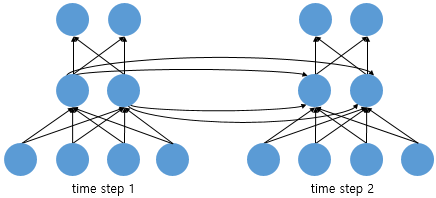

위의 그림은 입력 벡터의 차원이 4, 은닉 상태의 크기가 2, 출력층의 출력 벡터의 차원이 2인 RNN이 시점이 2일 때의 모습을 보여줍니다. 다시 말해 뉴런 단위로 해석하면 입력층의 뉴런 수는 4, 은닉층의 뉴런 수는 2, 출력층의 뉴런 수는 2입니다

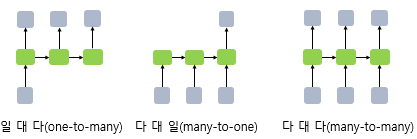

RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용할 수 있습니다. 위 그림은 입력과 출력의 길이에 따라서 달라지는 RNN의 다양한 형태를 보여줍니다. 

위 구조가 자연어 처리에서 어떻게 사용될 수 있는지 예를 들어봅시다. RNN 셀의 각 시점 별 입, 출력의 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'입니다.

예를 들어 
##### 이미지 캡셔닝(Image Captioning)
- 하나의 입력에 대해서 여러개의 출력(**one-to-many**)의 모델은 
- 하나의 이미지 입력에 대해서 
- 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning) 작업에 사용할 수 있습니다. 

사진의 제목은 단어들의 나열이므로 시퀀스 출력입니다.

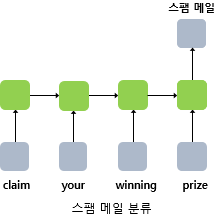

##### 감성 분류(sentiment classification),스팸 메일 분류(spam detection)
- 또한 단어 시퀀스에 대해서 하나의 출력(**many-to-one**)을 하는 모델은 
- 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(sentiment classification), 
- 또는 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection)에 사용할 수 있습니다. 

위 그림은 RNN으로 스팸 메일을 분류할 때의 아키텍처를 보여줍니다. 

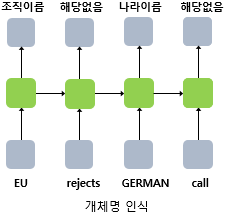

##### 챗봇,번역기,품사 태깅
- 다 대 다(**many-to-many**)의 모델의 경우에는 입력 문장으로 부터 대답 문장을 출력하는 챗봇과 입력 문장으로부터 번역된 문장을 출력하는 번역기, 
- 또는 개체명 인식이나 품사 태깅과 같은 작업 또한 속합니다. 

위 그림은 개체명 인식을 수행할 때의 RNN 아키텍처를 보여줍니다.

이제 RNN에 대한 수식을 정의해보겠습니다.

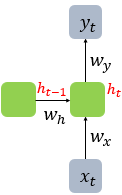

현재 시점 t에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은 $h_t$를 계산하기 위해서 총 두 개의 가중치를 갖게 됩니다. 하나는 입력층에서 입력값을 위한 가중치 $W_x$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t−1}$을 위한 가중치 $W_h$입니다.

이를 식으로 표현하면 다음과 같습니다.

은닉층 : $h_t= tanh( W_xx_t+W_hh_{t−1}+b)$  
출력층 : $y_t=f(W_yh_t+b)$

단, f는 비선형 활성화 함수 중 하나.

RNN의 은닉층 연산을 벡터와 행렬 연산으로 이해할 수 있습니다. 자연어 처리에서 RNN의 입력 $x_t$는 대부분의 경우에서 단어 벡터로 간주할 수 있는데, 단어 벡터의 차원을 d라고 하고, 은닉 상태의 크기를 $D_h$라고 하였을 때 각 벡터와 행렬의 크기는 다음과 같습니다.

$xt : (d×1)$  
$W_x : (D_h×d)$  
$W_h : (D_h×D_h)$  
$h_{t−1} : (D_h×1)$  
$b : (D_h×1)$  

배치 크기가 1이고, d와 $D_h$ 두 값 모두를 4로 가정하였을 때, RNN의 은닉층 연산을 그림으로 표현하면 아래와 같습니다.

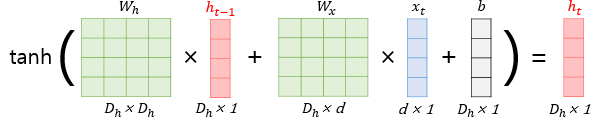

이때 ht를 계산하기 위한 활성화 함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용되지만, ReLU로 바꿔 사용하는 시도도 있습니다.

위의 식에서 각각의 가중치 $W_x, W_h, W_y$의 값은 모든 시점에서 값을 동일하게 공유합니다. 만약, 은닉층이 2개 이상일 경우에는 은닉층 2개의 가중치는 서로 다릅니다.

출력층은 결과값인 $y_t$를 계산하기 위한 활성화 함수로는 상황에 따라 다를텐데, 예를 들어서 이진 분류를 해야하는 경우라면 시그모이드 함수를 사용할 수 있고 다양한 카테고리 중에서 선택해야하는 문제라면 소프트맥스 함수를 사용하게 될 것입니다.

### 2. 케라스(Keras)로 RNN 구현하기
---
케라스로 RNN 층을 추가하는 코드는 다음과 같습니다.

##### RNN 층을 추가
model.add(SimpleRNN(hidden_size))

##### 인자 사용
model.add(SimpleRNN(hidden_size, input_shape=(timesteps, input_dim)))

##### 다른 표기
model.add(SimpleRNN(hidden_size, input_length=M, input_dim=N))

- hidden_size = 은닉 상태의 크기를 정의. 
 - 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. 
 - RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다.
- timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수.
- input_dim = 입력의 크기.

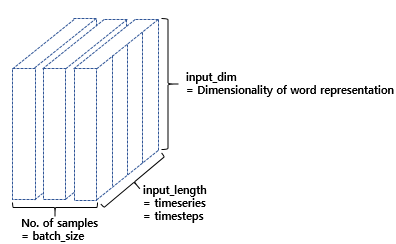

RNN 층은 (batch_size, timesteps, input_dim) 크기의 3D 텐서를 입력으로 받습니다. 
 batch_size는 한 번에 학습하는 데이터의 개수를 말합니다. (여기서부터는 텐서의 개념을 반드시 이해해야 하므로 벡터와 행렬 연산 챕터의 텐서 설명 부분을 참고하시기 바랍니다.) 다만, 이러한 표현은 사람이나 문헌에 따라서, 또는 풀고자 하는 문제에 따라서 종종 다르게 기재되는데 위의 그림은 문제와 상황에 따라서 다르게 표현되는 입력 3D 텐서의 대표적인 표현들을 보여줍니다.

헷갈리지 말아야할 점은 위의 코드는 출력층까지 포함한 하나의 완성된 인공 신경망 코드가 아니라 은닉층. 즉, RNN 층에 대한 코드라는 점입니다. 해당 코드가 리턴하는 결과값은 출력층의 결과가 아니라 하나의 은닉 상태 또는 정의하기에 따라 다수의 은닉 상태 입니다. 아래의 그림은 앞서 배운 출력층을 포함한 완성된 인공 신경망 그림과 은닉층까지만 표현한 그림의 차이를 보여줍니다.

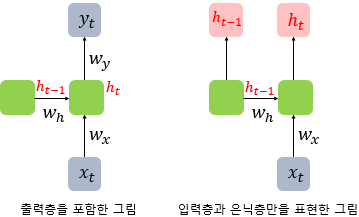

그렇다면 RNN 층은 위에서 설명한 입력 3D 텐서를 입력받아서 어떻게 은닉 상태를 출력할까요? RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보냅니다. 
- 메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴합니다. 
- 하지만, 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴합니다. 

이는 RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정이 가능합니다. (output_dim은 앞서 코드에서 정의한 hidden_size의 값으로 설정됩니다.)

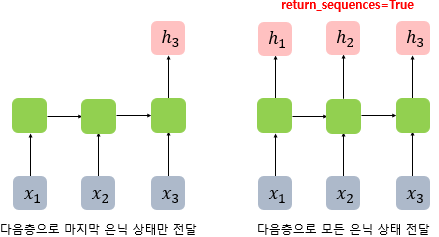

위의 그림은 time step=3일 때, return_sequences = True를 설정했을 때와 그렇지 않았을 때 어떤 차이가 있는지를 보여줍니다. 

- return_sequences=True를 선택하면 메모리 셀이 모든 시점(time step)에 대해서 은닉 상태값을 출력하며, 
- 별도 기재하지 않거나 return_sequences=False로 선택할 경우에는 메모리 셀은 하나의 은닉 상태값만을 출력합니다. 그리고 이 하나의 값은 마지막 시점(time step)의 메모리 셀의 은닉 상태값입니다.

마지막 은닉 상태만 전달하도록 하면 many-to-one 문제를 풀 수 있고, 모든 시점의 은닉 상태를 전달하도록 하면, 다음층에 은닉층이 하나 더 있는 경우이거나 many-to-many 문제를 풀 수 있습니다.

뒤에서 배우는 LSTM이나 GRU도 내부 메커니즘은 다르지만 model.add()를 통해서 층을 추가하는 코드는 사실상 SimpleRNN 코드와 같은 형태를 가집니다.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [6]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_size의 값인 3입니다. 이 경우 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 됩니다. 이번에는 batch_size를 미리 정의해보겠습니다.

In [7]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


batch_size를 8로 기재하자, 출력의 크기가 (8, 3)이 된 것을 볼 수 있습니다. 이제 return_sequences 매개 변수에 True를 기재하여 출력값으로 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴하도록 모델을 만들어 보도록 하겠습니다.

In [10]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력의 크기가 (8, 2, 3)이 된 것을 확인할 수 있습니다.

### 3. 파이썬으로 RNN 구현하기
직접 Numpy로 RNN 층을 구현해보겠습니다. 앞서 메모리 셀에서 은닉 상태를 계산하는 식을 다음과 같이 정의하였습니다.

$h_t=tanh(W_xX_t+W_hh_{t−1}+b)$  

실제 구현에 앞서 간단히 의사 코드(pseudocode)를 작성해보겠습니다.

아래의 코드는 의사 코드(pseudocode)로 실제 동작하는 코드가 아님. 

>```python
hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화  
for input_t in input_length: # 각 시점마다 입력을 받는다.  
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산  
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.
>```    

- t 시점의 은닉 상태를 hidden_state_t라는 변수로 선언하였고, 
- 입력 데이터의 길이를 input_length로 선언하였습니다. 
- 이 경우, 입력 데이터의 길이는 곧 총 시점의 수(timesteps)가 됩니다. 
- 그리고 t 시점의 입력값을 input_t로 선언하였습니다. 

각 메모리 셀은 각 시점마다 input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산합니다.

이제 RNN 층을 실제 동작되는 코드로 구현해보겠습니다. 아래의 코드는 이해를 돕기 위해 (timesteps, input_dim) 크기의 2D 텐서를 입력으로 받았다고 가정하였으나, 실제로 케라스에서는 (batch_size, timesteps, input_dim)의 크기의 3D 텐서를 입력으로 받는 것을 기억합시다.

In [13]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_dim = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_dim)) # 입력에 해당되는 2D 텐서
hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

우선 시점, 입력의 차원, 은닉 상태의 크기, 그리고 초기 은닉 상태를 정의하였습니다. 현재 초기 은닉 상태는 0의 값을 가지는 벡터로 초기화가 된 상태입니다. 초기 은닉 상태를 출력해보겠습니다.

In [16]:
print(hidden_state_t)  # 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0의 값을 가짐.

[0. 0. 0. 0. 0. 0. 0. 0.]


은닉 상태의 크기를 8로 정의하였으므로 8의 차원을 가지는 0의 값으로 구성된 벡터가 출력됩니다. 이제 가중치와 편향을 정의합니다.

In [17]:
Wx = np.random.random((hidden_size, input_dim)) # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

가중치와 편향을 m각 크기에 맞게 정의하였습니다. 가중치와 편향의 크기를 출력해보겠습니다.

In [20]:
print(np.shape(Wx), np.shape(Wh), np.shape(b), sep='\n')

(8, 4)
(8, 8)
(8,)


각 가중치와 편향의 크기는 다음과 같습니다. Wx는 (은닉 상태의 크기 × 입력의 차원), Wh는 (은닉 상태의 크기 × 은닉 상태의 크기), b는 (은닉 상태의 크기)의 크기를 가집니다. 이제 모든 시점의 은닉 상태를 출력한다고 가정하고, RNN 층을 동작시켜봅시다.

In [23]:
total_hidden_states=[]

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t)+b) # Wx * Xt + Wh * Ht-1 + b(bias)
    total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
    
    print(np.shape(total_hidden_states))  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
    
    hidden_state_t = output_t
    
total_hidden_states = np.stack(total_hidden_states, axis=0) # 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99982596 0.99989763 0.99920963 0.99988541 0.9997637  0.99999165
  0.99999261 0.99996595]
 [0.99965021 0.99978881 0.99668628 0.99967944 0.99928832 0.99994108
  0.9999468  0.9999443 ]
 [0.99974743 0.99990414 0.99913733 0.99983737 0.99956966 0.99998414
  0.99998217 0.99995602]
 [0.99966296 0.99992686 0.99897766 0.99981363 0.99978289 0.99998817
  0.99998772 0.99996772]
 [0.99975408 0.99995483 0.99964029 0.99990087 0.99971971 0.99999024
  0.99998745 0.99996066]
 [0.99971785 0.99993576 0.99913814 0.99988381 0.99979954 0.99998153
  0.99998333 0.99996281]
 [0.99975049 0.9999606  0.9994527  0.99992735 0.99991913 0.99999097
  0.99999281 0.99997334]
 [0.99979058 0.99995598 0.99973591 0.99990911 0.9996842  0.99999319
  0.99999037 0.99996067]
 [0.99969171 0.9999161  0.99888394 0.99983786 0.99970016 0.99997815
  0.99997859 0.99995903]
 [0.99975278 0.9999422  0.99944377 0.99991089 0.9996228  0.99996997
  0.99996799 0.99994666]

### 4. BPTT(Backpropagation through time, BPTT)
RNN도 다른 인공 신경망과 마찬가지로 역전파를 통해서 학습을 진행합니다. 피드 포워드 신경망의 역전파와 다른 점이 있다면, RNN은 전체 시점에 대해서 네트워크를 펼친 다음에 역전파를 사용하며 모든 시점에 대해서 가중치를 공유하고 있다는 점입니다. RNN의 이러한 역전파 과정을 BPTT(Backpropagation through time)이라고 부릅니다.

BPTT는 우선 순전파를 통해 모든 시점에 대해서 시퀀스를 출력하고, 각 시점별 손실(loss)를 계산하여

해당 내용은 추가 예정입니다. 몰라도 이후 실습에 문제 없는 부분이므로 무시하고 학습하세요.

### 5. 깊은 순환 신경망(Deep Recurrent Neural Network)

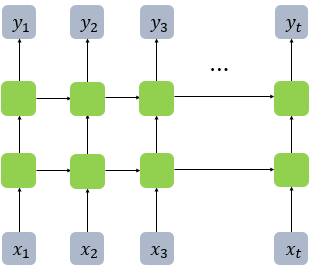

앞서 RNN도 다수의 은닉층을 가질 수 있다고 언급한 바 있습니다. 위의 그림은 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망의 모습을 보여줍니다. 은닉층을 2개 추가하는 경우 코드는 아래와 같습니다.

In [24]:
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences = True))
model.add(SimpleRNN(hidden_size, return_sequences = True))

위의 코드에서 첫번째 은닉층은 다음 은닉층이 존재하므로 return_sequences = True를 설정하여 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보내주고 있습니다.

### 6. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)
양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반합니다.

영어 빈칸 채우기 문제에 비유하여 보겠습니다.
>```
Exercise is very effective at [          ] belly fat.
1) reducing
2) increasing
3) multiplying
>```

'운동은 복부 지방을 [ ] 효과적이다'라는 영어 문장이고, 정답은 reducing(줄이는 것)입니다. 그런데 위의 영어 빈 칸 채우기 문제를 잘 생각해보면 정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족합니다. 목적어인 belly fat(복부 지방)를 모르는 상태라면 정답을 결정하기가 어렵습니다.

즉, RNN이 과거 시점(time step)의 데이터들을 참고해서, 찾고자하는 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많습니다. 그래서 이전 시점의 데이터뿐만 아니라, 이후 시점의 데이터도 힌트로 활용하기 위해서 고안된 것이 양방향 RNN입니다.

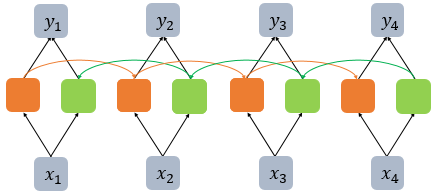

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다. 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됩니다.

In [35]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size
                        , return_sequences=True)
                        , input_shape=(timesteps, input_dim)))

물론, 양방향 RNN도 다수의 은닉층을 가질 수 있습니다. 아래의 그림은 양방향 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 양방향 순환 신경망의 모습을 보여줍니다.

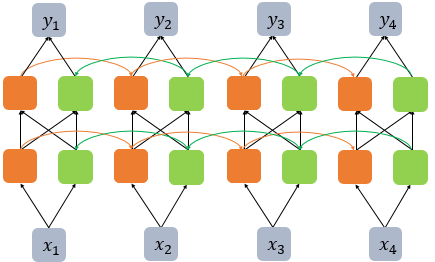

다른 인공 신경망 모델들도 마찬가지이지만, 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아닙니다. 은닉층을 추가하면, 학습할 수 있는 양이 많아지지만 또한 반대로 훈련 데이터 또한 그만큼 많이 필요합니다. 아래의 코드는 은닉층이 4개인 경우를 보여줍니다.

In [36]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))